https://openmvg.readthedocs.io/en/latest/openMVG/cameras/cameras/

In [317]:
import json
import pandas as pd
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["figure.constrained_layout.use"] = True

# dimensions = 8688 * 5792 px

model = '20200108-114317-20191022-00001-italy-venice-san_barnaba-0002-calle_dei_colori' 
sfm_data_path = "/media/gargantua/1000-plane/0000-sfm/" + model[0:4] + "/" + model[4:8] + "/" + model + "/systems/omvg/sfm_data.json"

with open(sfm_data_path) as sfm_data:
    data = json.load(sfm_data)
    views = data['views']
    extrinsics = data['extrinsics']
    intrinsics = data['intrinsics']
    structure = data['structure']
    
views_keys = []
files = []
for view in views:
    views_keys.append(view['key'])
    files.append(view['value']['ptr_wrapper']['data']['filename'].replace('.tif',''))
    
key_to_file_dict = dict(zip(views_keys,files))
    
extrinsics_keys = []
camera_poses = []
for extrinsic in extrinsics:
    extrinsics_keys.append(extrinsic['key'])
    camera_poses.append([extrinsic['value']['rotation'],extrinsic['value']['center']])
    
key_to_pose_dict = dict(zip(extrinsics_keys,camera_poses))


In [321]:
extrinsics

[{'key': 0,
  'value': {'rotation': [[0.7241709767931045,
     0.08603198552950196,
     -0.6842330698207829],
    [-0.17881880562656138, 0.9816775894715586, -0.06582510982596433],
    [0.6660332057223656, 0.17002237439572998, 0.726286555761586]],
   'center': [-1.6721934148086754,
    -0.014834837639469778,
    -0.1733064691035923]}},
 {'key': 1,
  'value': {'rotation': [[0.9674229513636796,
     0.005346881025226001,
     -0.2531091543940867],
    [-0.0012923021932846046, 0.9998682174221006, 0.016182637121066993],
    [0.25316232565259145, -0.015328361049146177, 0.967302371659306]],
   'center': [-1.6743023208938268,
    -0.03556722435485633,
    -0.17374244198503602]}},
 {'key': 2,
  'value': {'rotation': [[0.9935947949696335,
     0.03436406365301363,
     -0.10764987012766607],
    [-0.038754240828493366, 0.9984890327712245, -0.03895844264587218],
    [0.10614844429881617, 0.04288079482514522, 0.9934252589944071]],
   'center': [-1.5760706281149852,
    -0.032330976382201504,
    

In [200]:

principal_point = intrinsics[0]['value']['ptr_wrapper']['data']['principal_point']
c_u = principal_point[0]
c_v = principal_point[1]
focal = intrinsics[0]['value']['ptr_wrapper']['data']['focal_length']
width = intrinsics[0]['value']['ptr_wrapper']['data']['width']
height = intrinsics[0]['value']['ptr_wrapper']['data']['height']

# du coup on peut retrouver la résolution des images dans les intrinsics (position du point principal) 
# et en utilisant les dimensions du capteur (24 x 36 mm)
k_u = 36 / width
k_v = 24 / height

In [244]:
K = np.array([[focal * k_u, 0, c_u],[0, focal * k_v, c_v],[0,0,1]])
K.shape
K

array([[1.45216527e+01, 0.00000000e+00, 4.35488140e+03],
       [0.00000000e+00, 1.45216527e+01, 2.88659884e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [217]:
structure

[{'key': 10,
  'value': {'X': [-1.0773924255380107,
    0.43733464368454356,
    0.5657823480318271],
   'observations': [{'key': 0,
     'value': {'id_feat': 3818, 'x': [4229, 3880.60009765625]}},
    {'key': 1,
     'value': {'id_feat': 1034, 'x': [5880.240234375, 4763.919921875]}},
    {'key': 2,
     'value': {'id_feat': 2934, 'x': [6189.580078125, 4666.10986328125]}}]}},
 {'key': 12,
  'value': {'X': [-0.9507482222443054,
    -0.16799010658204747,
    0.5294394271478413],
   'observations': [{'key': 0,
     'value': {'id_feat': 26695, 'x': [4456.5, 1719.8199462890625]}},
    {'key': 1,
     'value': {'id_feat': 1073, 'x': [6383.81982421875, 2412.1298828125]}},
    {'key': 2,
     'value': {'id_feat': 8580, 'x': [6799.56982421875, 2047.8900146484375]}},
    {'key': 6,
     'value': {'id_feat': 23950, 'x': [7424.60009765625, 2214.909912109375]}},
    {'key': 7,
     'value': {'id_feat': 17282, 'x': [6185.7900390625, 2200.330078125]}},
    {'key': 8,
     'value': {'id_feat': 29244, 

In [214]:
extrinsics

[{'key': 0,
  'value': {'rotation': [[0.7241709767931045,
     0.08603198552950196,
     -0.6842330698207829],
    [-0.17881880562656138, 0.9816775894715586, -0.06582510982596433],
    [0.6660332057223656, 0.17002237439572998, 0.726286555761586]],
   'center': [-1.6721934148086754,
    -0.014834837639469778,
    -0.1733064691035923]}},
 {'key': 1,
  'value': {'rotation': [[0.9674229513636796,
     0.005346881025226001,
     -0.2531091543940867],
    [-0.0012923021932846046, 0.9998682174221006, 0.016182637121066993],
    [0.25316232565259145, -0.015328361049146177, 0.967302371659306]],
   'center': [-1.6743023208938268,
    -0.03556722435485633,
    -0.17374244198503602]}},
 {'key': 2,
  'value': {'rotation': [[0.9935947949696335,
     0.03436406365301363,
     -0.10764987012766607],
    [-0.038754240828493366, 0.9984890327712245, -0.03895844264587218],
    [0.10614844429881617, 0.04288079482514522, 0.9934252589944071]],
   'center': [-1.5760706281149852,
    -0.032330976382201504,
    

In [ ]:
for pt_3d in structure:
    X = np.transpose(np.array(pt_3d['value']['X']))
    X = np.append(X,1)
    print(X)
    print(X.shape)
    for obs in pt_3d['value']['observations']:
        u = np.array(obs['value']['x'])
        u = np.append(u,1)
        print(u)
        print(u.shape)
        camera_pose = key_to_pose_dict.get(obs['key'])
        R = np.transpose(np.array(camera_poses[0][0]))
        t = - np.matmul(R, np.transpose(np.array([camera_poses[0][1]])))
        R_t = np.concatenate((R, t), axis = 1)
        u_proj = np.matmul(np.matmul(K, R_t), X)
        err = np.linalg.norm(u - u_proj)
        print(err)

In [218]:
structure[0]

{'key': 10,
 'value': {'X': [-1.0773924255380107, 0.43733464368454356, 0.5657823480318271],
  'observations': [{'key': 0,
    'value': {'id_feat': 3818, 'x': [4229, 3880.60009765625]}},
   {'key': 1,
    'value': {'id_feat': 1034, 'x': [5880.240234375, 4763.919921875]}},
   {'key': 2,
    'value': {'id_feat': 2934, 'x': [6189.580078125, 4666.10986328125]}}]}}

In [220]:
extrinsics[0:3]

[{'key': 0,
  'value': {'rotation': [[0.7241709767931045,
     0.08603198552950196,
     -0.6842330698207829],
    [-0.17881880562656138, 0.9816775894715586, -0.06582510982596433],
    [0.6660332057223656, 0.17002237439572998, 0.726286555761586]],
   'center': [-1.6721934148086754,
    -0.014834837639469778,
    -0.1733064691035923]}},
 {'key': 1,
  'value': {'rotation': [[0.9674229513636796,
     0.005346881025226001,
     -0.2531091543940867],
    [-0.0012923021932846046, 0.9998682174221006, 0.016182637121066993],
    [0.25316232565259145, -0.015328361049146177, 0.967302371659306]],
   'center': [-1.6743023208938268,
    -0.03556722435485633,
    -0.17374244198503602]}},
 {'key': 2,
  'value': {'rotation': [[0.9935947949696335,
     0.03436406365301363,
     -0.10764987012766607],
    [-0.038754240828493366, 0.9984890327712245, -0.03895844264587218],
    [0.10614844429881617, 0.04288079482514522, 0.9934252589944071]],
   'center': [-1.5760706281149852,
    -0.032330976382201504,
    

In [255]:
X = np.transpose(np.array(structure[1]['value']['X']))
#X = np.append(X,1)
obs = structure[0]['value']['observations'][1]
u = obs['value']['x']
u = np.append(u,1)
img = key_to_pose_dict.get(obs['key'])
R = np.array(img[0])
C = np.array(img[1])
t = - np.matmul(R, C)
print(u)
u_proj = np.matmul(np.matmul(K,R), X) + t
print(u_proj)
np.linalg.norm(u-u_proj)

[5.88024023e+03 4.76391992e+03 1.00000000e+00]
[1.17953870e+03 7.88694500e+02 8.65395954e-01]


6156.217353881602

In [257]:
# disp R
extrinsics

[{'key': 0,
  'value': {'rotation': [[0.7241709767931045,
     0.08603198552950196,
     -0.6842330698207829],
    [-0.17881880562656138, 0.9816775894715586, -0.06582510982596433],
    [0.6660332057223656, 0.17002237439572998, 0.726286555761586]],
   'center': [-1.6721934148086754,
    -0.014834837639469778,
    -0.1733064691035923]}},
 {'key': 1,
  'value': {'rotation': [[0.9674229513636796,
     0.005346881025226001,
     -0.2531091543940867],
    [-0.0012923021932846046, 0.9998682174221006, 0.016182637121066993],
    [0.25316232565259145, -0.015328361049146177, 0.967302371659306]],
   'center': [-1.6743023208938268,
    -0.03556722435485633,
    -0.17374244198503602]}},
 {'key': 2,
  'value': {'rotation': [[0.9935947949696335,
     0.03436406365301363,
     -0.10764987012766607],
    [-0.038754240828493366, 0.9984890327712245, -0.03895844264587218],
    [0.10614844429881617, 0.04288079482514522, 0.9934252589944071]],
   'center': [-1.5760706281149852,
    -0.032330976382201504,
    

In [258]:
extrinsics[0]

{'key': 0,
 'value': {'rotation': [[0.7241709767931045,
    0.08603198552950196,
    -0.6842330698207829],
   [-0.17881880562656138, 0.9816775894715586, -0.06582510982596433],
   [0.6660332057223656, 0.17002237439572998, 0.726286555761586]],
  'center': [-1.6721934148086754, -0.014834837639469778, -0.1733064691035923]}}

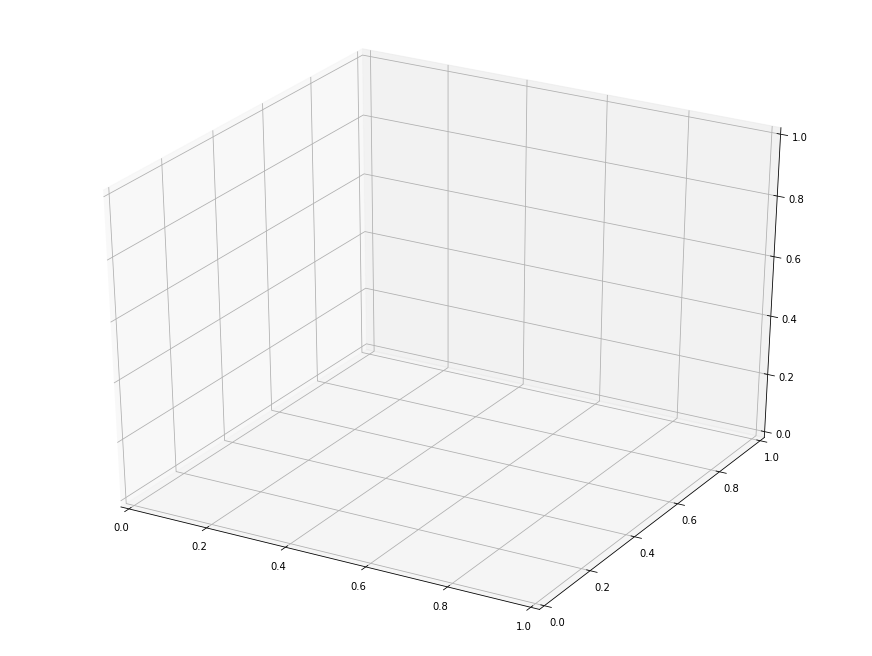

In [316]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for ext in extrinsics[:10]:
    x = (ext['value']['center'][0])
    y = (ext['value']['center'][1])
    z = (ext['value']['center'][2])
    u = (np.array(ext['value']['rotation'])[:,0])
    v = (np.array(ext['value']['rotation'])[:,1])
    w = np.array(ext['value']['rotation'])[:,2]
    """ax.quiver(x,y,z,u[0], u[1], u[2], color = 'red', length= np.linalg.norm(u), normalize = False)
    ax.quiver(x,y,z,v[0], v[1], v[2], color = 'green', length= np.linalg.norm(v), normalize = False)
    ax.quiver(x,y,z,w[0], w[1], w[2], color = 'blue', length= np.linalg.norm(w), normalize = False)
    
    
ax.scatter(x, y, z, c = 'red')
ax.scatter(x, y, z, c = 'green')
ax.scatter(x, y, z, c = 'blue')

#ax.quiver(x,y,z,u[0][0], u[0][1], u[0][2])    

np.linalg.norm(u)
"""

In [ ]:
for v in eig_vec:
    ax.quiver(
        mean_x, mean_y, mean_z, # <-- starting point of vector
        v[0] - mean_x, v[1] - mean_y, v[2] - mean_z, # <-- directions of vector
        color = 'red', alpha = .8, lw = 3,
    )